Acceleromter Stuff
====
Initial investigation

In [1]:
from ema import read, parse, analysis

In [2]:
""" Find the accelerometer file """
device_id = "6012582"
recording_id = "0000291121"
participant_id = "20029"

# Windows path to RDSF mount on Z:
# Let's hope it's in the Week 1 folder
accel_path = read.accel_filepath(device_id, recording_id, participant_id)

assert accel_path.exists()

In [3]:
""" Find the smartwatch data from the combined smartwatch file """
meal_df = read.meal_info(participant_id)
allowed_meal_types = {"Snack", "Drink", "Meal", "No food/drink"}
meal_df = parse.extract_meals(meal_df, allowed_meal_types, verbose=True)

Discarding: {'Catch-up end': 1, 'Catch-up start': 1, 'No catch-up': 2, 'No response': 72}
Kept: {'Drink': 35, 'Meal': 37, 'No food/drink': 4, 'Snack': 2}


In [4]:
""" Read the accelerometry file """
samples = read.accel_info(str(accel_path))

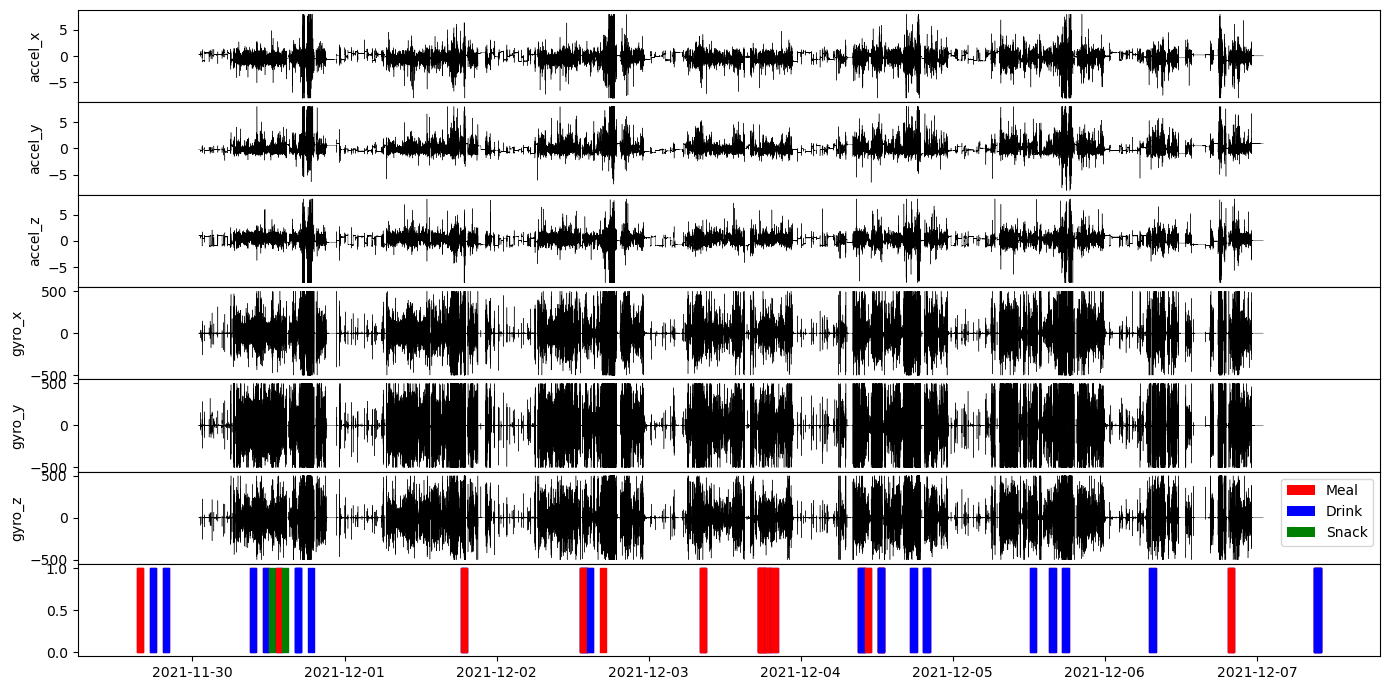

In [5]:
""" Plot each component of acceleration and the meal times """
import matplotlib.pyplot as plt

times = samples["time"]

fig, axes = plt.subplots(
    7,
    1,
    figsize=(14, 7),
    sharex=True,
)

column_titles = [f"accel_{p}" for p in ("x", "y", "z")] + [
    f"gyro_{p}" for p in ("x", "y", "z")
]

for col, axis in zip(column_titles, axes):
    axis.plot(times[::20], samples[col][::20], linewidth=0.3, color="k")
    axis.set_ylabel(col)


# Plot also the meal times on the bottom axis

""" Plot the meal times as well """
import pandas as pd
from matplotlib.patches import Patch

times = meal_df["date"].map(str) + meal_df["timestamp"]

ends = pd.to_datetime(times, format=r"%d%b%Y%H:%M:%S")
starts = ends - pd.Timedelta(1, "hour")

colours = {"Meal": "r", "Drink": "b", "Snack": "g"}
for start, end, meal_type in zip(starts, ends, meal_df["meal_type"]):
    if meal_type in colours:
        axes[6].fill_between(
            [start, end], [0.0, 0.0], [1.0, 1.0], color=colours[meal_type]
        )

axes[-2].legend(handles=[Patch(facecolor=v, label=k) for k, v in colours.items()])

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

### Research Question: is there an accelerometry signature for eating, and/or for the different types of meal?